In [1]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
data=pd.read_csv("health care diabetes.csv", na_values={"Glucose":[0," "], "BloodPressure":[0," "], "SkinThickness":[0," "], "Insulin":[0," "], "BMI":[0," "]})

In [2]:
data.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1


In [3]:
data.shape

(768, 9)

In [4]:
print("We habe 768 observations in our sample dataset with 9 variables where 'Outcome' is our target variable.")

We habe 768 observations in our sample dataset with 9 variables where 'Outcome' is our target variable.


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


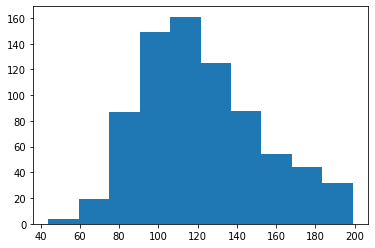

In [8]:
plt.hist(x=data.Glucose)
plt.show()

In [9]:
#as Gluscose is symmetrically distributed, we will take mean to fill na values
from sklearn.impute import SimpleImputer
si=SimpleImputer(strategy="mean")
data["Glucose"]=si.fit_transform(data["Glucose"].values.reshape(-1,1))

/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


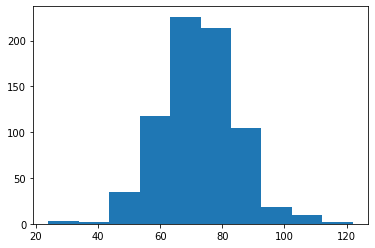

In [10]:
plt.hist(x=data.BloodPressure)
plt.show()

In [11]:
#as BloodPressure is symmetrically distributed, we will take "mean" to fill na values
from sklearn.impute import SimpleImputer
si=SimpleImputer(strategy="mean")
data["BloodPressure"]=si.fit_transform(data["BloodPressure"].values.reshape(-1,1))

/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


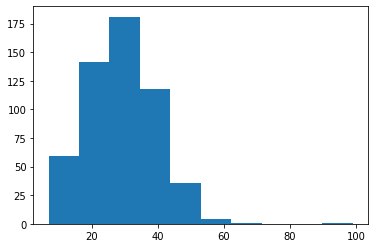

In [12]:
plt.hist(x=data.SkinThickness)
plt.show()

In [13]:
#as SkinThickness is rightly skewed distributed, we will take "median" to fill na values
from sklearn.impute import SimpleImputer
si=SimpleImputer(strategy="median")
data["SkinThickness"]=si.fit_transform(data["SkinThickness"].values.reshape(-1,1))

/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


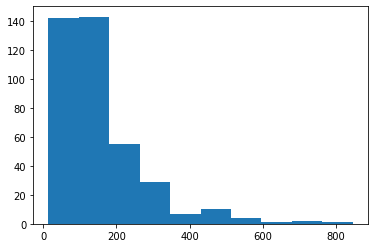

In [14]:
plt.hist(x=data.Insulin)
plt.show()

In [15]:
#as Insulin is rightly skewed distributed, we will take "median" to fill na values
from sklearn.impute import SimpleImputer
si=SimpleImputer(strategy="median")
data["Insulin"]=si.fit_transform(data["Insulin"].values.reshape(-1,1))

/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


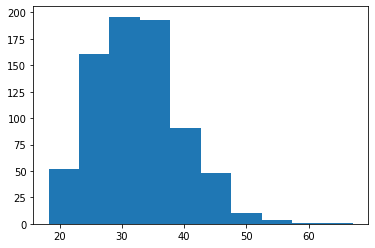

In [16]:
plt.hist(x=data.BMI)
plt.show()

In [17]:
#as BMI is symmetrically distributed, we will take "mean" to fill na values
from sklearn.impute import SimpleImputer
si=SimpleImputer(strategy="mean")
data["BMI"]=si.fit_transform(data["BMI"].values.reshape(-1,1))

In [18]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

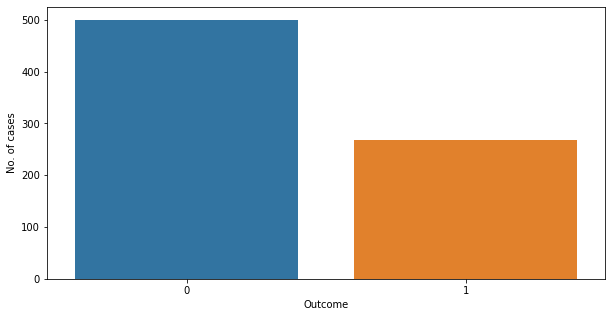

In [19]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.countplot(data["Outcome"])
plt.xlabel("Outcome")
plt.ylabel("No. of cases")
plt.show()

In [20]:
data.groupby("Outcome")["Glucose"].aggregate(["mean", "median", max, min, "count", "std"])

,mean,median,max,min,count,std
Outcome,,,,,,
0,110.710121,107.5,197.0,44.0,500,24.71706
1,142.165573,140.0,199.0,78.0,268,29.54175


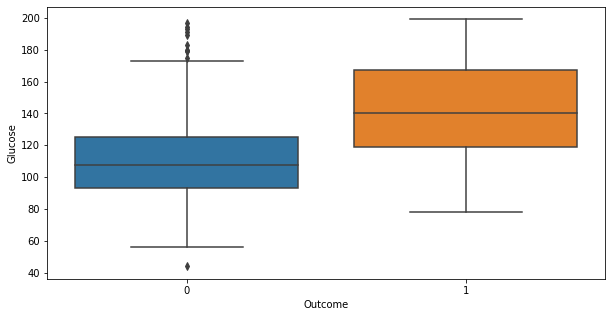

In [21]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Outcome", y="Glucose", data=data)
plt.show()

In [22]:
print(" So, for outcome as non-diabetic person the average glucose level is 110.7 which is lower than a diabetic person and the chances of having diabetes increased with glucose level, it means both are strongly positively correlated.")

 So, for outcome as non-diabetic person the average glucose level is 110.7 which is lower than a diabetic person and the chances of having diabetes increased with glucose level, it means both are strongly positively correlated.


In [23]:
data.groupby("Outcome")["Pregnancies"].aggregate(["mean", "median", max, min, "count", "std"])

,mean,median,max,min,count,std
Outcome,,,,,,
0,3.298000,2,13,0,500,3.017185
1,4.865672,4,17,0,268,3.741239


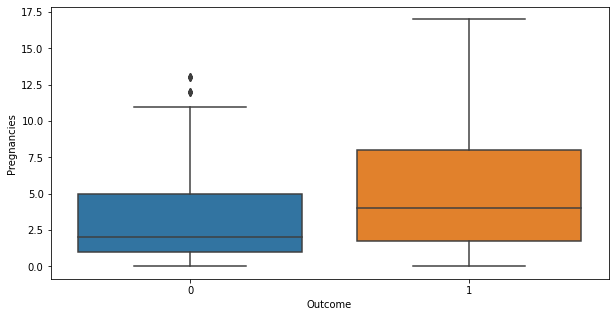

In [24]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Outcome", y="Pregnancies", data=data)
plt.show()

In [25]:
print(" So, for outcome as non-diabetic person the average no. of pregnancies is 3.29 which is lower than a diabetic person and the chances of having diabetes increased with no. of pregnancies, it means both are positively correlated.")

 So, for outcome as non-diabetic person the average no. of pregnancies is 3.29 which is lower than a diabetic person and the chances of having diabetes increased with no. of pregnancies, it means both are positively correlated.


In [26]:
data.groupby("Outcome")["BloodPressure"].aggregate(["mean", "median", max, min, "count", "std"])

,mean,median,max,min,count,std
Outcome,,,,,,
0,70.935397,72.0,122.0,24.0,500,11.931033
1,75.147324,74.0,114.0,30.0,268,11.945712


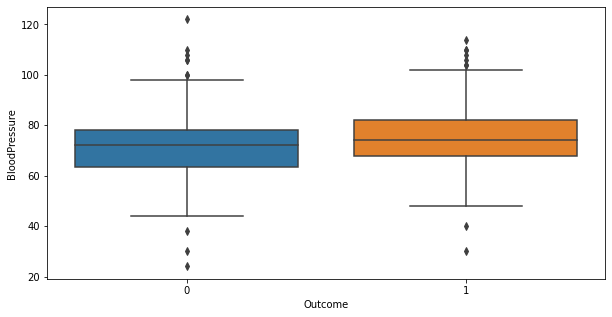

In [27]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Outcome", y="BloodPressure", data=data)
plt.show()
##Outliers need further investigation.

In [28]:
data.groupby("Outcome")["SkinThickness"].aggregate(["mean", "median", max, min, "count", "std"])

,mean,median,max,min,count,std
Outcome,,,,,,
0,27.726000,29.0,60.0,7.0,500,8.552966
1,31.686567,29.0,99.0,7.0,268,8.662994


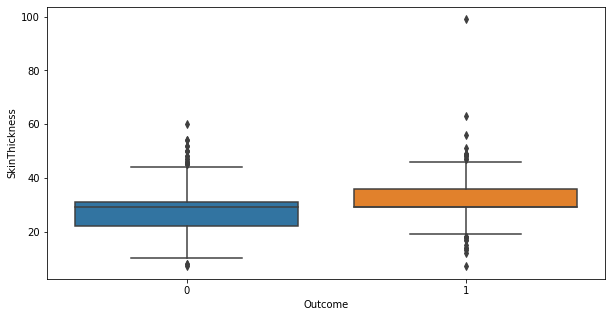

In [29]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Outcome", y="SkinThickness", data=data)
plt.show()

In [30]:
data.groupby("Outcome")["Insulin"].aggregate(["mean", "median", max, min, "count", "std"])

,mean,median,max,min,count,std
Outcome,,,,,,
0,127.792000,125.0,744.0,15.0,500,74.447469
1,164.701493,125.0,846.0,14.0,268,100.932249


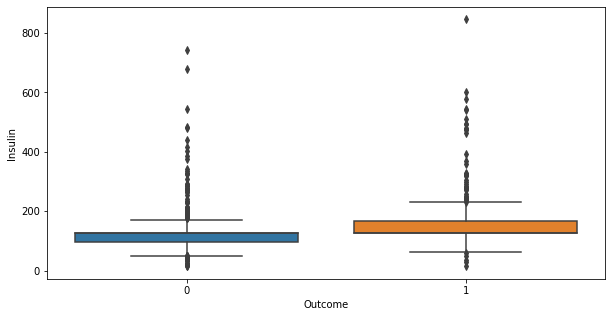

In [31]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Outcome", y="Insulin", data=data)
plt.show()

In [32]:
data.groupby("Outcome")["BMI"].aggregate(["mean", "median", max, min, "count", "std"])

,mean,median,max,min,count,std
Outcome,,,,,,
0,30.888434,30.40,57.3,18.2,500,6.504779
1,35.384757,34.25,67.1,22.9,268,6.595065


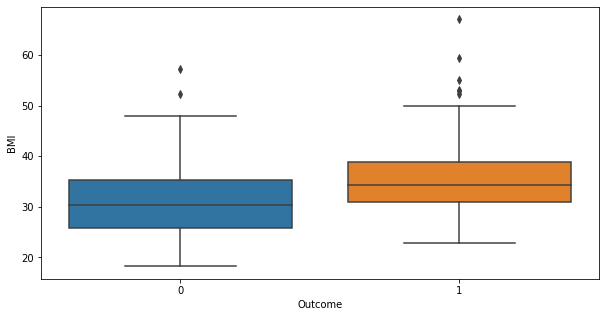

In [33]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Outcome", y="BMI", data=data)
plt.show()

In [34]:
data.groupby("Outcome")["Age"].aggregate(["mean", "median", max, min, "count", "std"])

,mean,median,max,min,count,std
Outcome,,,,,,
0,31.190000,27,81,21,500,11.667655
1,37.067164,36,70,21,268,10.968254


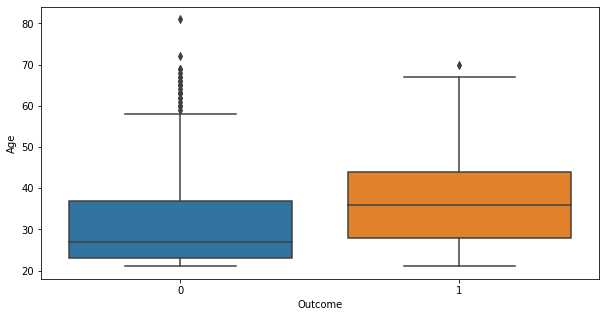

In [35]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Outcome", y="Age", data=data)
plt.show()

In [36]:
data.groupby("Outcome")["DiabetesPedigreeFunction"].aggregate(["mean", "median", max, min, "count", "std"])

,mean,median,max,min,count,std
Outcome,,,,,,
0,0.429734,0.336,2.329,0.078,500,0.299085
1,0.550500,0.449,2.420,0.088,268,0.372354


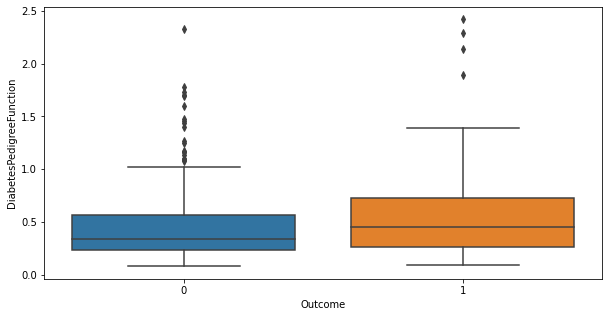

In [37]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Outcome", y="DiabetesPedigreeFunction", data=data)
plt.show()

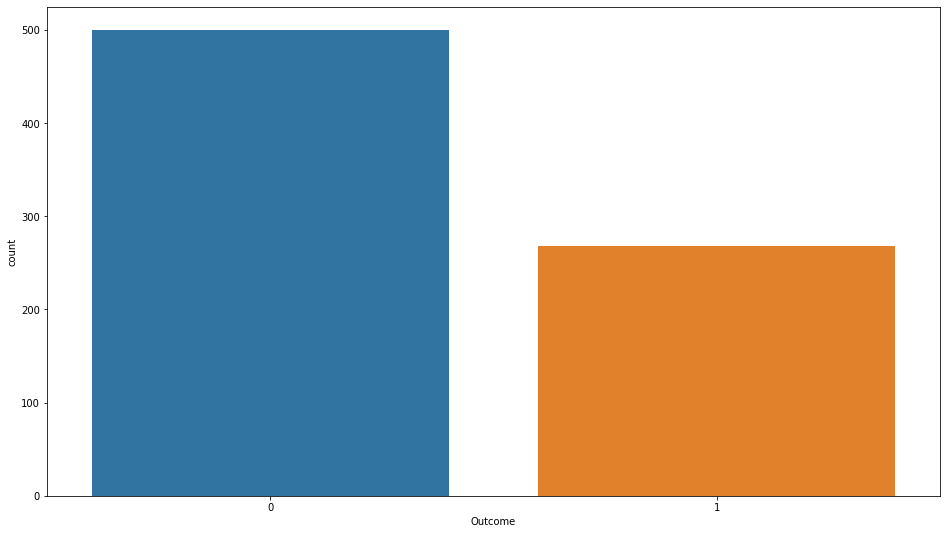

In [38]:
import seaborn as sns
plt.figure(figsize=(16,9))
sns.countplot(data["Outcome"])
plt.show()

In [39]:
data.Outcome.value_counts()
print("Findings: data is inbalanced, we have more number of observations for non-diabetic than diabetic")

Findings: data is inbalanced, we have more number of observations for non-diabetic than diabetic


In [40]:
!pip install imblearn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/local/bin/python3.7 -m pip install --upgrade pip' command.


In [41]:
from imblearn.over_sampling import SMOTE

Using TensorFlow backend.


In [42]:
smote=SMOTE()
##we will use SMOTE technique to our train dataset to make our train dataset balanced.

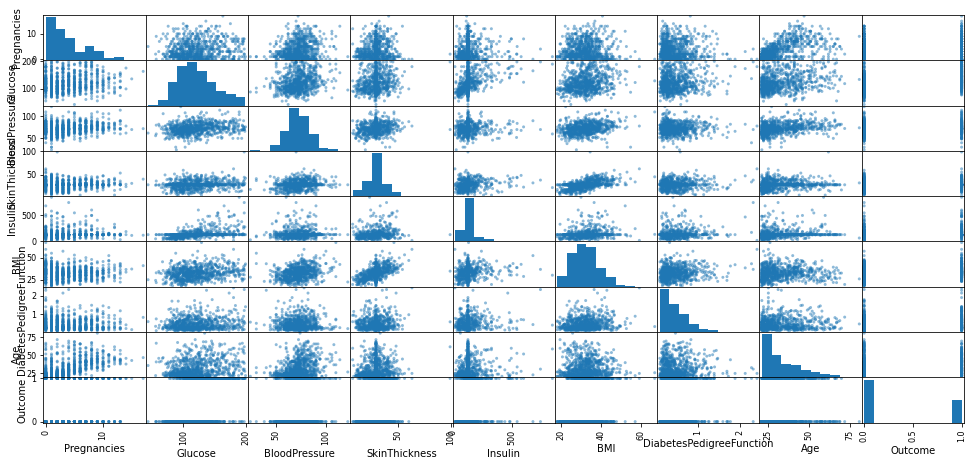

In [43]:
scatter_matrix(data, figsize=(16.5,7.5))
plt.show()

In [44]:
corrmat=data.corr()

<AxesSubplot:>

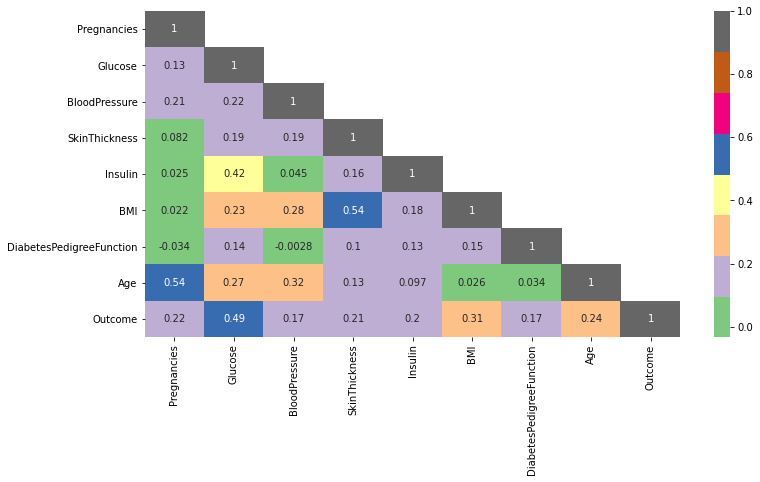

In [45]:
plt.figure(figsize=(12,6))
m=np.ones_like(corrmat)
m[np.tril_indices_from(m)]=0
sns.heatmap(corrmat, annot=True, cmap="Accent", mask=m)

In [46]:
print("Observation: from the scatterplots of the dataset and correlation matrix, we can say, all variables are positvely corelated to the dependent variable 'Outcome', among all the variables 'Glucose' has higher correlation value with 'Outcome' or 'Glucose' is more effective than other varibales for being a diabetic person.After 'Glucose', 'BMI' & 'Age' have more impact than other variables."  )

Observation: from the scatterplots of the dataset and correlation matrix, we can say, all variables are positvely corelated to the dependent variable 'Outcome', among all the variables 'Glucose' has higher correlation value with 'Outcome' or 'Glucose' is more effective than other varibales for being a diabetic person.After 'Glucose', 'BMI' & 'Age' have more impact than other variables.


In [47]:
#to handle the outliers
from scipy.stats import zscore
z=abs(zscore(data))
data_mod=data[(z<3).all(axis=1)]

In [48]:
data.shape, data_mod.shape

((768, 9), (718, 9))

In [49]:
X=data_mod.drop(columns="Outcome")
y=data_mod.Outcome

In [50]:
#to handle the skewness
X.skew()
import numpy as np
for col in X.columns:
    if X[col].skew()>.55:
        X[col]=np.log1p(X[col])

In [51]:
X.skew()

Pregnancies                -0.279087
Glucose                    -0.046195
BloodPressure               0.138556
SkinThickness               0.076828
Insulin                    -0.879176
BMI                         0.329505
DiabetesPedigreeFunction    0.804702
Age                         0.593590
dtype: float64

In [52]:
import numpy as np
for col in X.columns:
    if X[col].skew()>.55:
        X[col]=np.log1p(X[col])

In [53]:
X.skew()

Pregnancies                -0.279087
Glucose                    -0.046195
BloodPressure               0.138556
SkinThickness               0.076828
Insulin                    -0.879176
BMI                         0.329505
DiabetesPedigreeFunction    0.562291
Age                         0.500849
dtype: float64

In [54]:
#to handle multi collinearity of predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor as vifs
vif=pd.DataFrame()
vif["Features"]=X.columns
vif["VIF"]=[vifs(X.values,i) for i in range(X.shape[1])]
vif

,Features,VIF
0,Pregnancies,4.836643
1,Glucose,417.548114
2,BloodPressure,52.656019
3,SkinThickness,19.378956
4,Insulin,157.574742
5,BMI,39.840841
6,DiabetesPedigreeFunction,6.402787
7,Age,392.146155


In [55]:
new_data=data.drop (columns=["BloodPressure", "SkinThickness", "Insulin"])
new_data.columns

Index(['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age',
       'Outcome'],
      dtype='object')

In [56]:
#performing standard scaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_=sc.fit_transform(X)
X_mod=pd.DataFrame(X_, columns=X.columns)

In [57]:
from sklearn.model_selection import train_test_split as split
X_train, X_test, y_train, y_test=split(X_mod,y, random_state=123, test_size=.2)

In [59]:
from sklearn.model_selection import train_test_split as split
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error
model=[LogisticRegression(),SVC(), DecisionTreeClassifier(), RandomForestClassifier()]
for m in model:
    m.fit(X_train, y_train)
    m.score(X_train, y_train)
    y_pred=m.predict(X_test)
    print("for model:", m,"acc_score:", accuracy_score(y_test, y_pred))
    print("mse:",mean_absolute_error(y_test, y_pred))
    print("rmse:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("*********************************************")
    print()
    print() 

for model: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) acc_score: 0.7986111111111112
mse: 0.2013888888888889
rmse: 0.44876373392787533
*********************************************


for model: SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) acc_score: 0.7708333333333334
mse: 0.22916666666666666
rmse: 0.47871355387816905
*********************************************


for model: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, m

In [60]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn.score(X_train, y_train)
y_pred=knn.predict(X_test)
print("for model:", m,"acc_score:", accuracy_score(y_test, y_pred))
print("mse:",mean_absolute_error(y_test, y_pred))
print("rmse:", np.sqrt(mean_squared_error(y_test, y_pred)))

for model: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) acc_score: 0.7430555555555556
mse: 0.2569444444444444
rmse: 0.5068968775248516


In [62]:
X2=new_data.drop (columns=["Outcome"])
y2=new_data.Outcome

In [63]:
#performing standard scaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X2_=sc.fit_transform(X2)
X2_mod=pd.DataFrame(X2_, columns=X2.columns)

In [64]:
from sklearn.model_selection import train_test_split as split
X2_train, X2_test, y2_train, y2_test=split(X2_mod,y2, random_state=123, test_size=.2)

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
models=[LogisticRegression(), GaussianNB()]
for mo in models:
    mo.fit(X_train, y_train)
    mo.score(X_train, y_train)
    y_pred=m.predict(X_test)
    print("for model:", mo,"acc_score:", accuracy_score(y_test, y_pred))
    print("mse:",mean_absolute_error(y_test, y_pred))
    print("rmse:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("*********************************************")
    print()
    print() 
    

for model: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) acc_score: 0.7986111111111112
mse: 0.2013888888888889
rmse: 0.44876373392787533
*********************************************


for model: GaussianNB(priors=None, var_smoothing=1e-09) acc_score: 0.7986111111111112
mse: 0.2013888888888889
rmse: 0.44876373392787533
*********************************************




In [66]:
print ("observation: Logistic Regression & GaussianNB is giving us higher degree of accuracy, so we will go forward with this model")

observation: Logistic Regression is giving us higher degree of accuracy, so we will go forward with this model


In [67]:
#SMOTE technique to balance the dataset
X_train_smote,y_train_smote=smote.fit_sample(X_train.astype(float), y_train)

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
models=[LogisticRegression(), GaussianNB()]
for mo in models:
    mo.fit(X_train_smote, y_train_smote)
    mo.score(X_train_smote, y_train_smote)
    y_pred=m.predict(X_test)
    print("for model:", mo,"acc_score:", accuracy_score(y_test, y_pred))
    print("mse:",mean_absolute_error(y_test, y_pred))
    print("rmse:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("*********************************************")
    print()
    print() 
    

for model: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) acc_score: 0.7986111111111112
mse: 0.2013888888888889
rmse: 0.44876373392787533
*********************************************


for model: GaussianNB(priors=None, var_smoothing=1e-09) acc_score: 0.7986111111111112
mse: 0.2013888888888889
rmse: 0.44876373392787533
*********************************************




In [73]:
#Ensemble technique to improve the accuracy
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
rf=RandomForestClassifier(n_estimators=500, random_state=123)
gdb=GradientBoostingClassifier()
adb=AdaBoostClassifier(base_estimator=LogisticRegression(), n_estimators=500, random_state=123)
en=[rf, gdb,adb]
for i in en:
    i.fit(X_train, y_train)
    i.score(X_train, y_train)
    y_pred=i.predict(X_test)
    print("for Ensemble Tech", i, "Accuracy Score:", accuracy_score(y_test,y_pred))
    print("mse:",mean_absolute_error(y_test, y_pred))
    print("rmse:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print()
    print()

for Ensemble Tech RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False) Accuracy Score: 0.7777777777777778
mse: 0.2222222222222222
rmse: 0.4714045207910317


for Ensemble Tech GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_

In [79]:
from sklearn.model_selection import GridSearchCV
param_grid={"max_iter": [100,200,300,400,5000],
           "random_state": range(42,200)}
clf=GridSearchCV(LogisticRegression(), param_grid)
clf.fit(X_train,y_train)
clf.best_params_

{'max_iter': 100, 'random_state': 42}

In [82]:
from sklearn.model_selection import train_test_split as split
X2_train, X2_test, y2_train, y2_test=split(X2_mod,y2, random_state=42, test_size=.2)
final_model=LogisticRegression()
final_model.fit(X_train, y_train)
final_model.score(X_train, y_train)
y_pred=final_model.predict(X_test)
print("for Model",final_model , "Accuracy Score:", accuracy_score(y_test,y_pred))
print("mse:",mean_absolute_error(y_test, y_pred))
print("rmse:", np.sqrt(mean_squared_error(y_test, y_pred)))

for Model LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) Accuracy Score: 0.7986111111111112
mse: 0.2013888888888889
rmse: 0.44876373392787533


In [83]:
from sklearn.externals import joblib
joblib.dump(final_model, "Model_diabetes_predictor.obj")

/usr/local/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['Model_diabetes_predictor.obj']